In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
import copy
from openpyxl import load_workbook
from scipy.optimize import minimize_scalar
import functions as func

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})




import ipywidgets as widgets # For interactive plots/buttons
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
col = ['r', 'b', 'g', 'y', 'm', 'c']


 
from matplotlib import cm
# plt.style.use('seaborn-whitegrid')
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass
path = 'exports/export2507/'


## 1. Saving

**Loading model class**

In [2]:
model = HANCModelClass(name = 'Baseline') 

par = model.par
ss = model.ss

max_iter_solve = 50000
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.G = 0.25

# Initial steady state
model.find_ss()

**Preparing choices**

In [3]:
# Path for saving the results
# model.max_iter_solve = 50000
export = False
path = 'exports/export2507/'


In [4]:

list_G =  [0.05, 0.1, 0.2, 0.3 ]#, 0.4, 0.5 ] #[0.05, 0.1,  0.2, 0.3]  #,  0.6, 0.8 ]#, 1.0]
list_TFP = [1.0, 2.0 ]#, 5.0, 10.0, 50.0]



vars = ['w', 'wt', 'ELL_hh', 'G_exp', 'G_share', 'G_exp_share', 'U_hh', 'C_hh', 'Y', 'A_hh']
CDF_vars = ['u', 'a', 'ell', 'c',  'inc', 'mu']

# CDF's of assets and productivity 

## 2. Calculating stationary equilibriums for government and TFP levels

**Dictionary of models for sigma < 1**

In [5]:
dict_base = func.create_model_dict(model,list_tfp=list_TFP, list_G =list_G)

Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.05
solved for TFP = 1.0 G = 0.1
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.3
Solving for TFP = 2.0
solved for TFP = 2.0 G = 0.05
solved for TFP = 2.0 G = 0.1
solved for TFP = 2.0 G = 0.2
solved for TFP = 2.0 G = 0.3


**Dictionary of models for sigma > 1**

In [6]:
# Create a model with sigma = 1.1
model_sigma11 = model.copy(name = 'sigma = 1.1')
model_sigma11.par.sigma = 1.1

# Create a dictionary with the results for sigma = 1.1
dict_sigma11 = func.create_model_dict(model_sigma11,list_tfp=list_TFP, list_G =list_G)

Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.05
solved for TFP = 1.0 G = 0.1
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.3
Solving for TFP = 2.0
solved for TFP = 2.0 G = 0.05
solved for TFP = 2.0 G = 0.1
solved for TFP = 2.0 G = 0.2
solved for TFP = 2.0 G = 0.3


## 3. Ploting stationary equilibriums before growth 

**Plotting AggVarGov**
var over G 

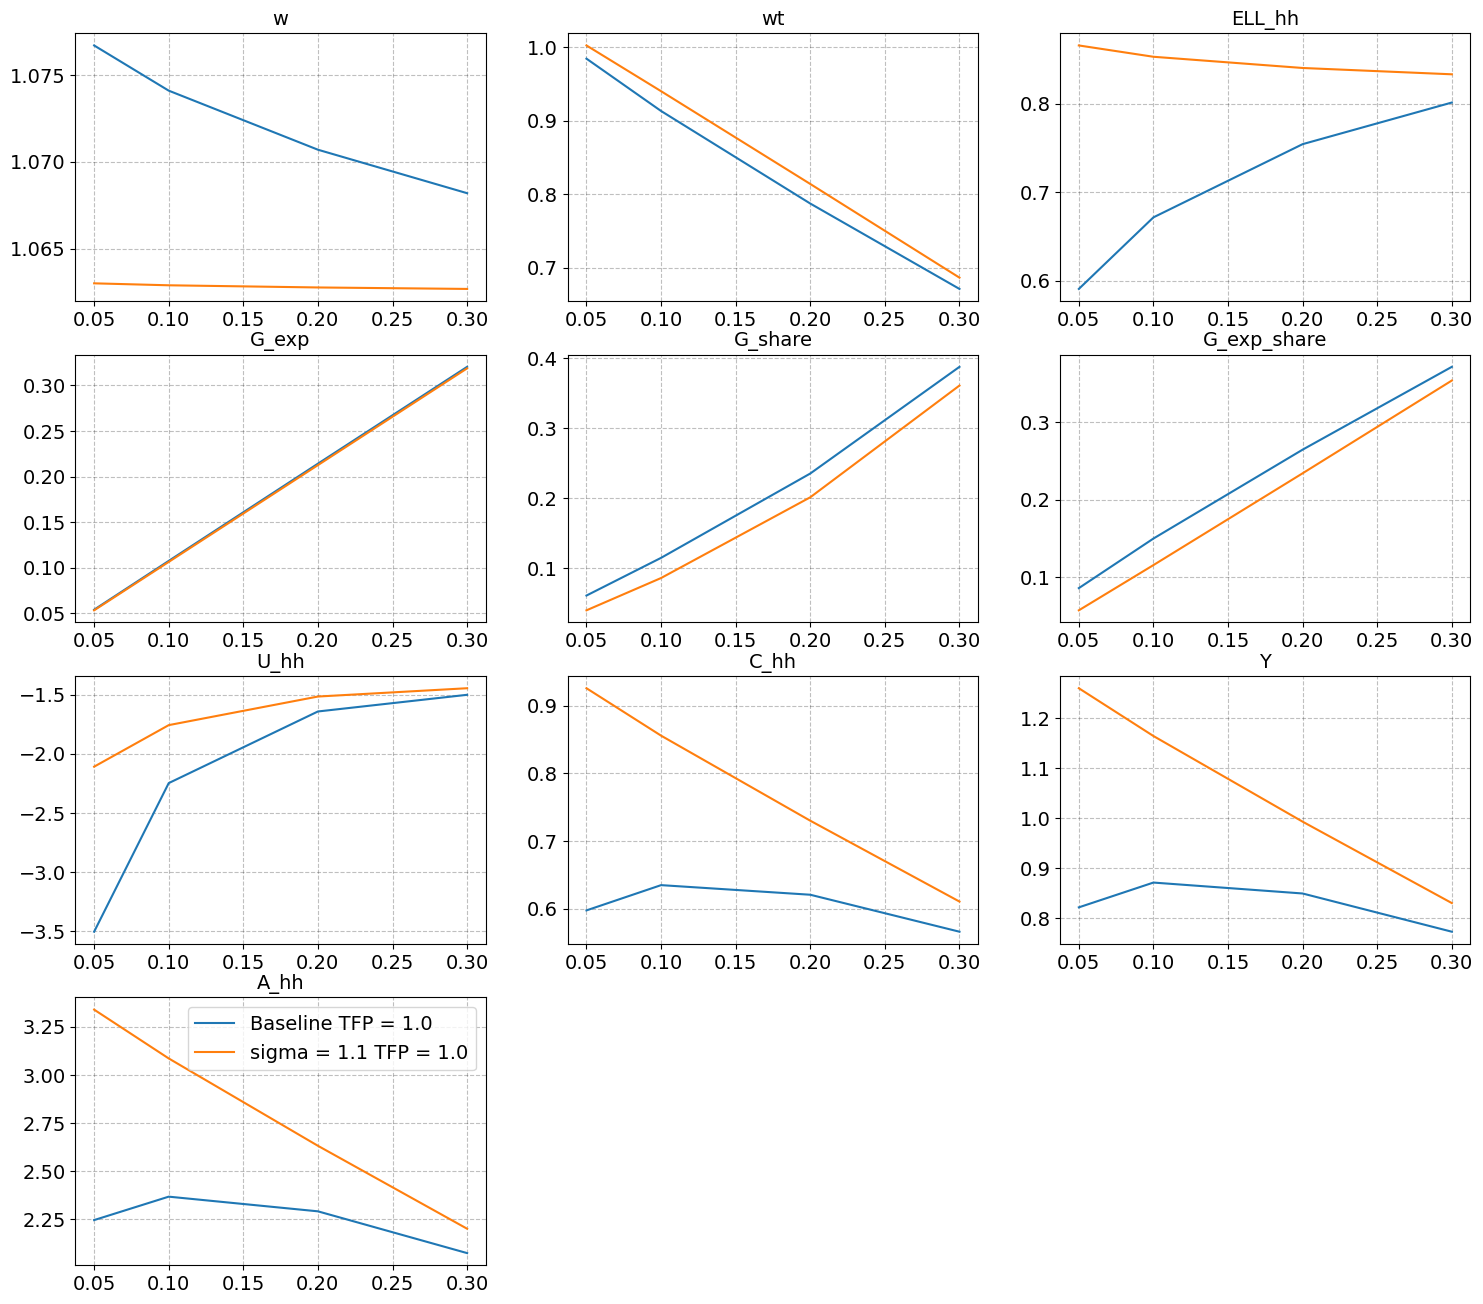

In [7]:
# Both models
func.plot_G_compare([dict_base, dict_sigma11], vars, list_TFP= [1.0], list_G=list_G)

if export: plt.savefig(path + 'AggVarGov_both.png', dpi = 300) 

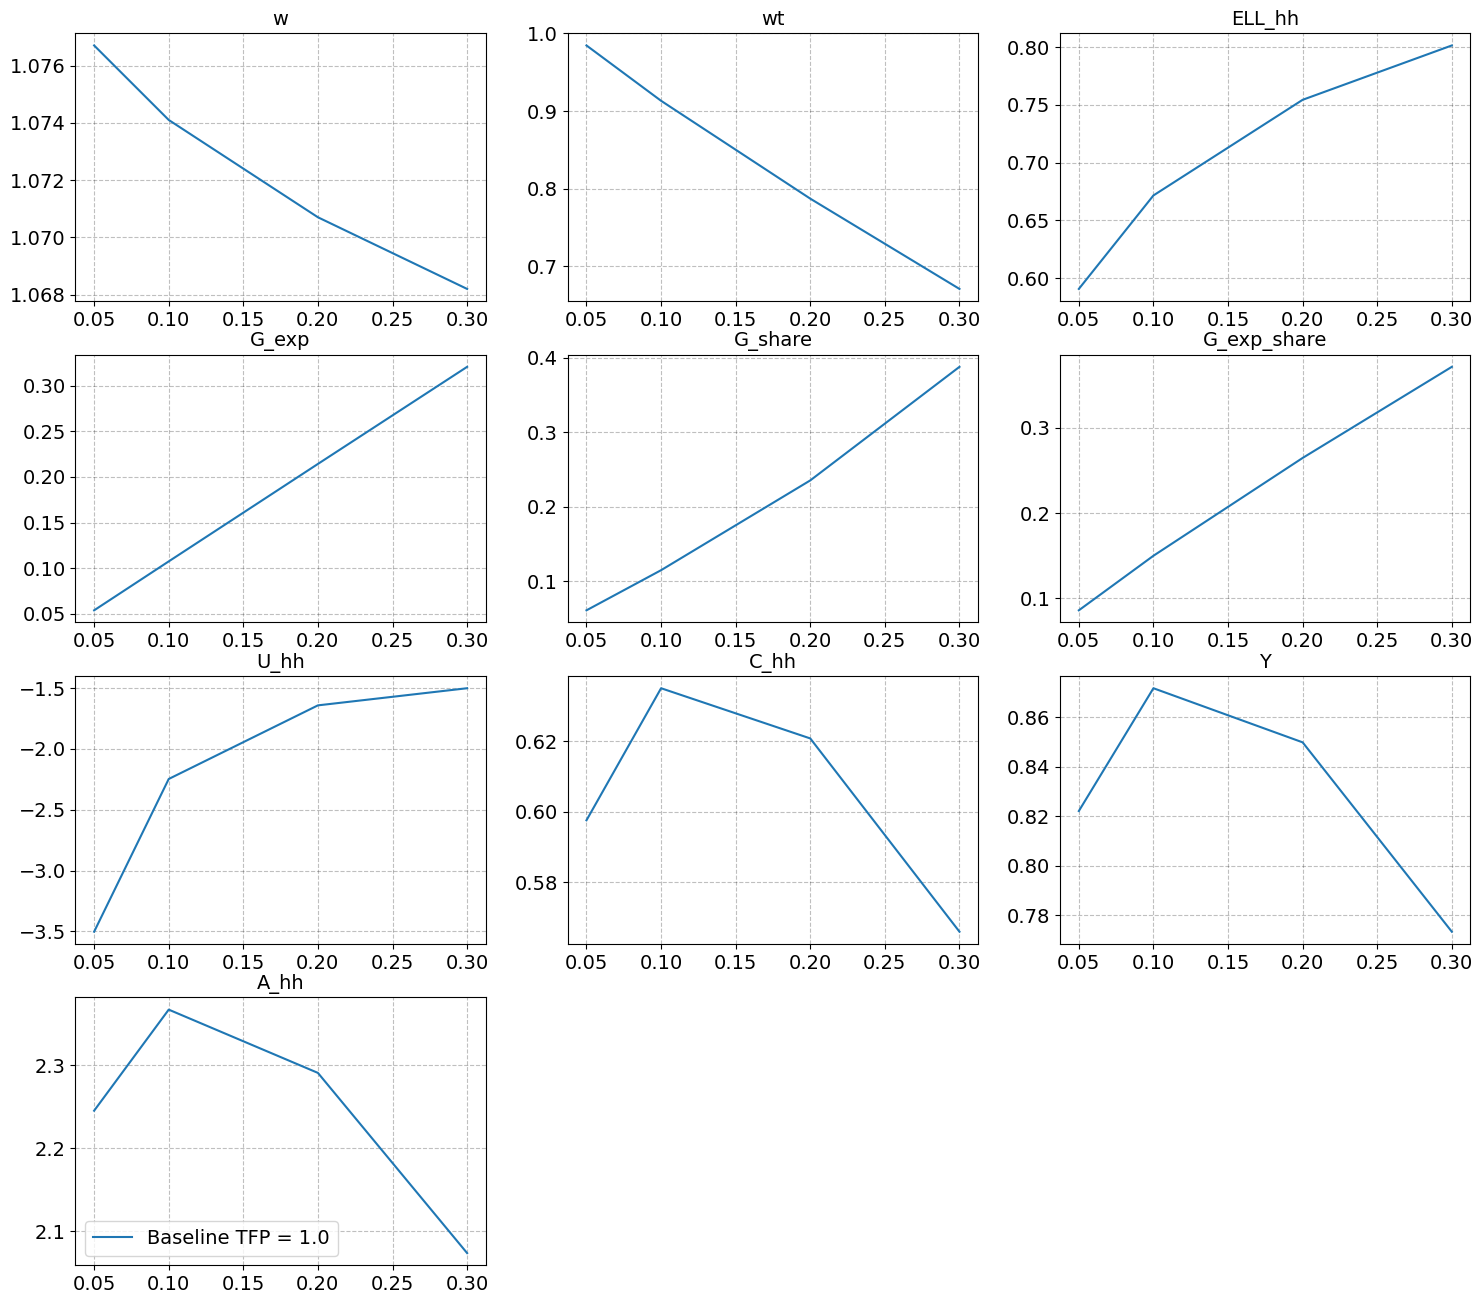

In [8]:
# Base
# Fig 2.1: AggVarGov for base model
plot_AggVArGov_base = func.plot_G_compare([dict_base], vars, list_TFP= [1.0], list_G=list_G)
if export: plt.savefig(path + 'AggVarGov_base.png', dpi = 300)

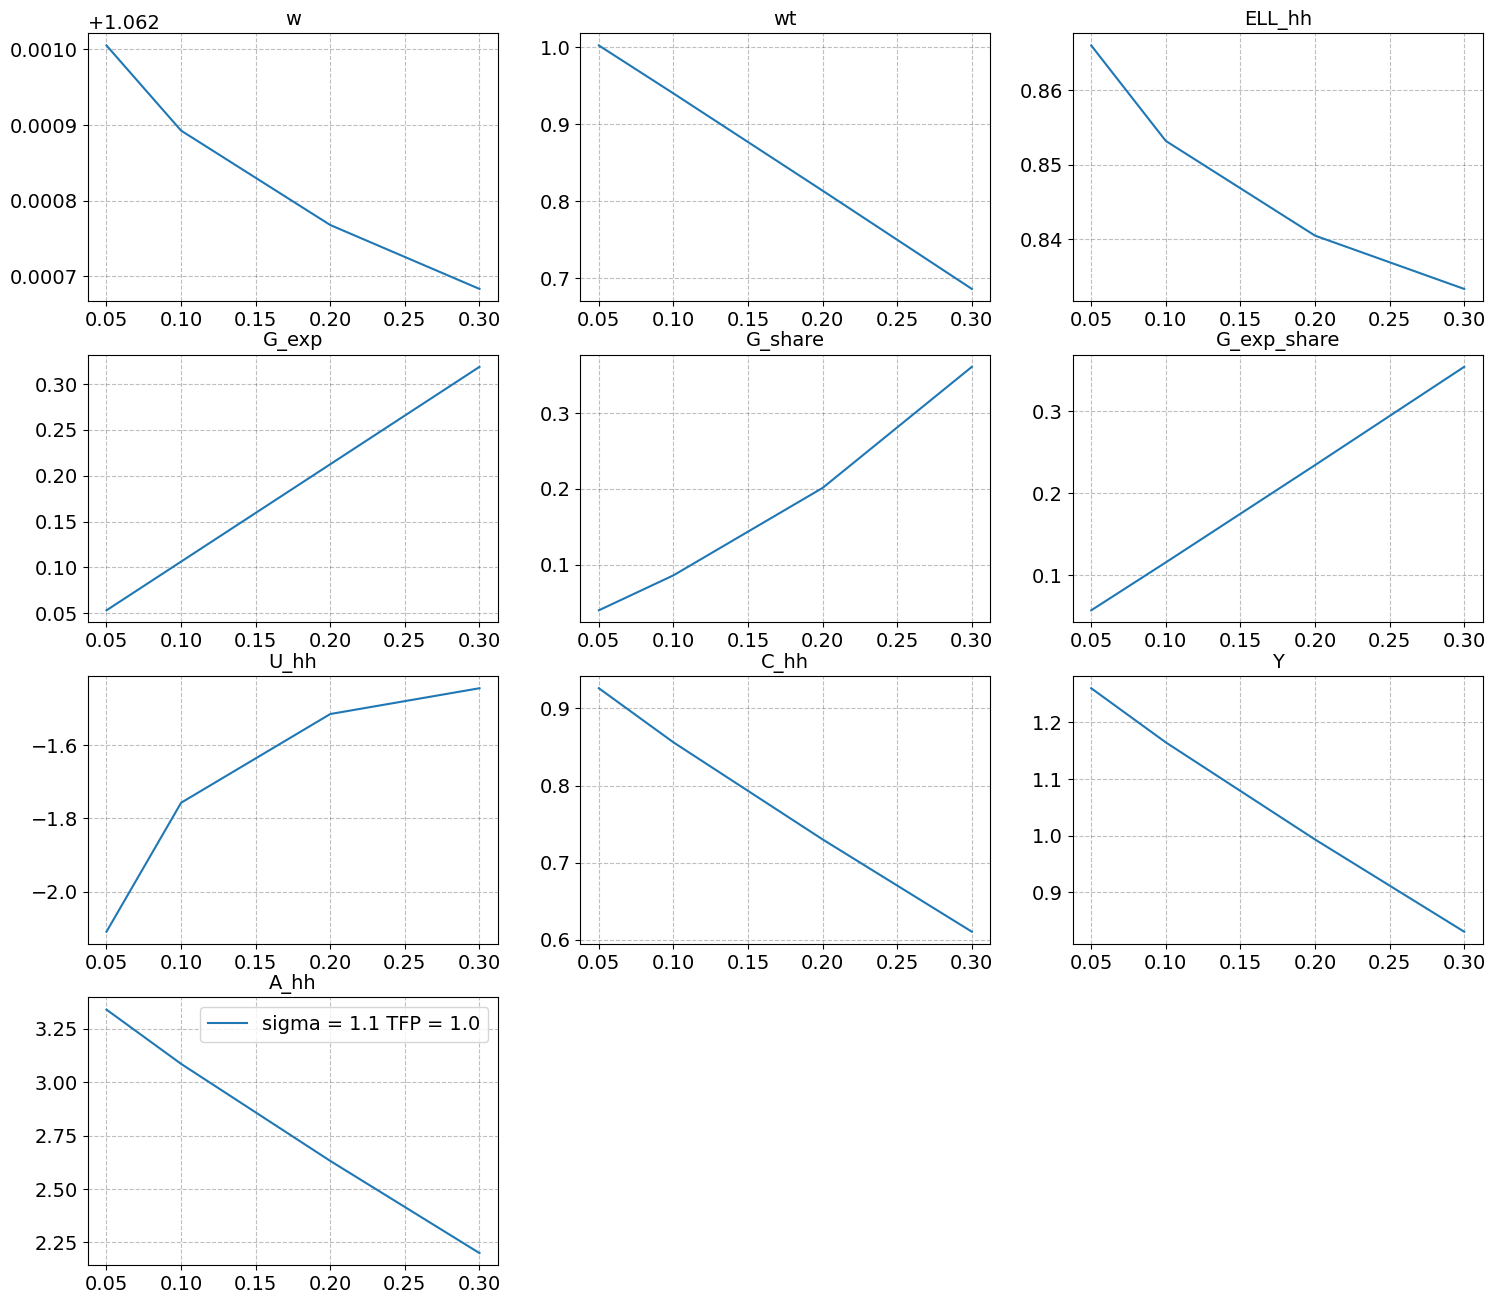

In [9]:
# Sigma 1.1
# Fig 2.1: AggVarGov for model_sigma11
plot_AggVArGov_s11 = func.plot_G_compare([dict_sigma11], vars, list_TFP= [1.0], list_G=list_G)
if export: plt.savefig(path + 'AggVarGov_s11.png', dpi = 300)

**PlottingCDF_dG**
CDF over different policy choices 

In [11]:
list_G

[0.05, 0.1, 0.2, 0.3]

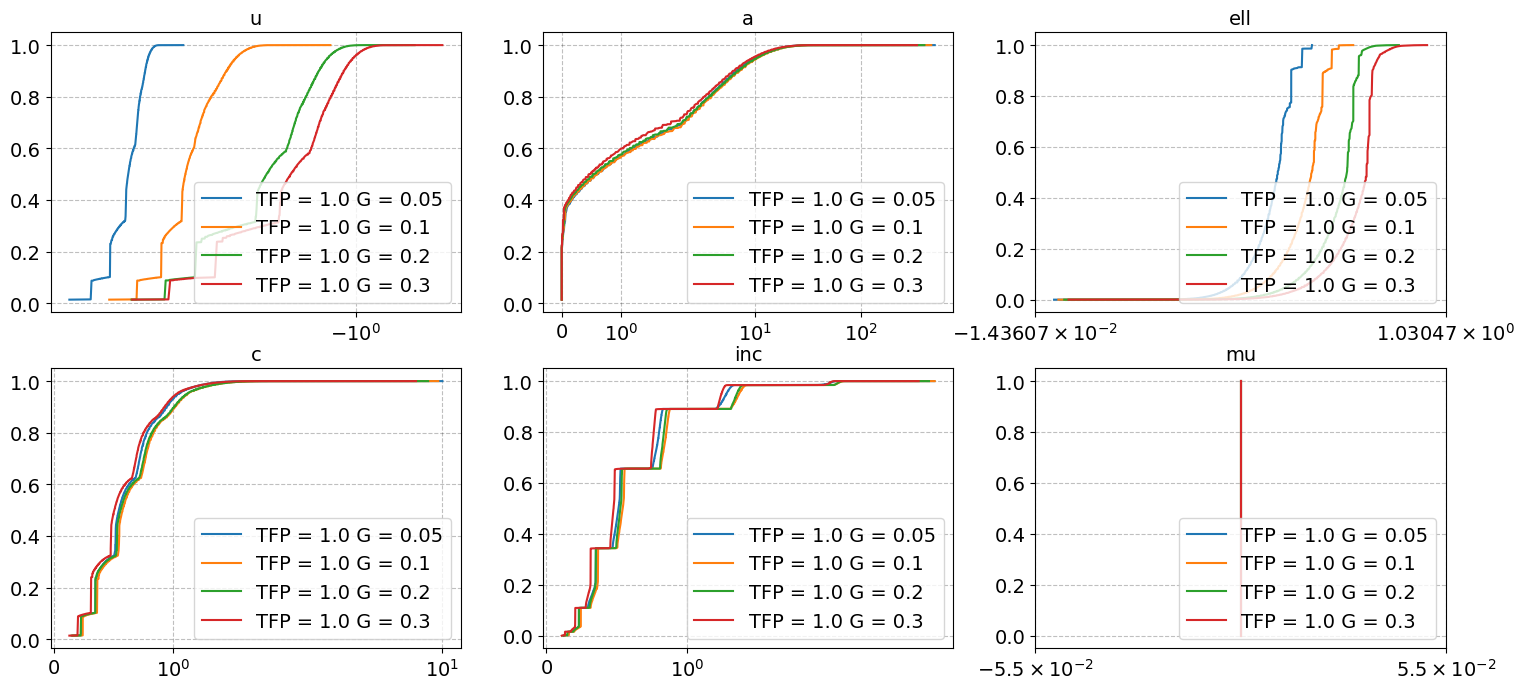

In [13]:
# Base
list_G_ = list_G #[0.2, 0.3,   0.4,  0.6]
list_models = [dict_base['TFP = 1.0'][f'G = {G}'] for G in list_G]

plot_CDF_dG_base = func.plot_cum(list_models, CDF_vars)
# Saving in path 
if export: plt.savefig(path + 'CDF_dG_base.png', dpi = 300)

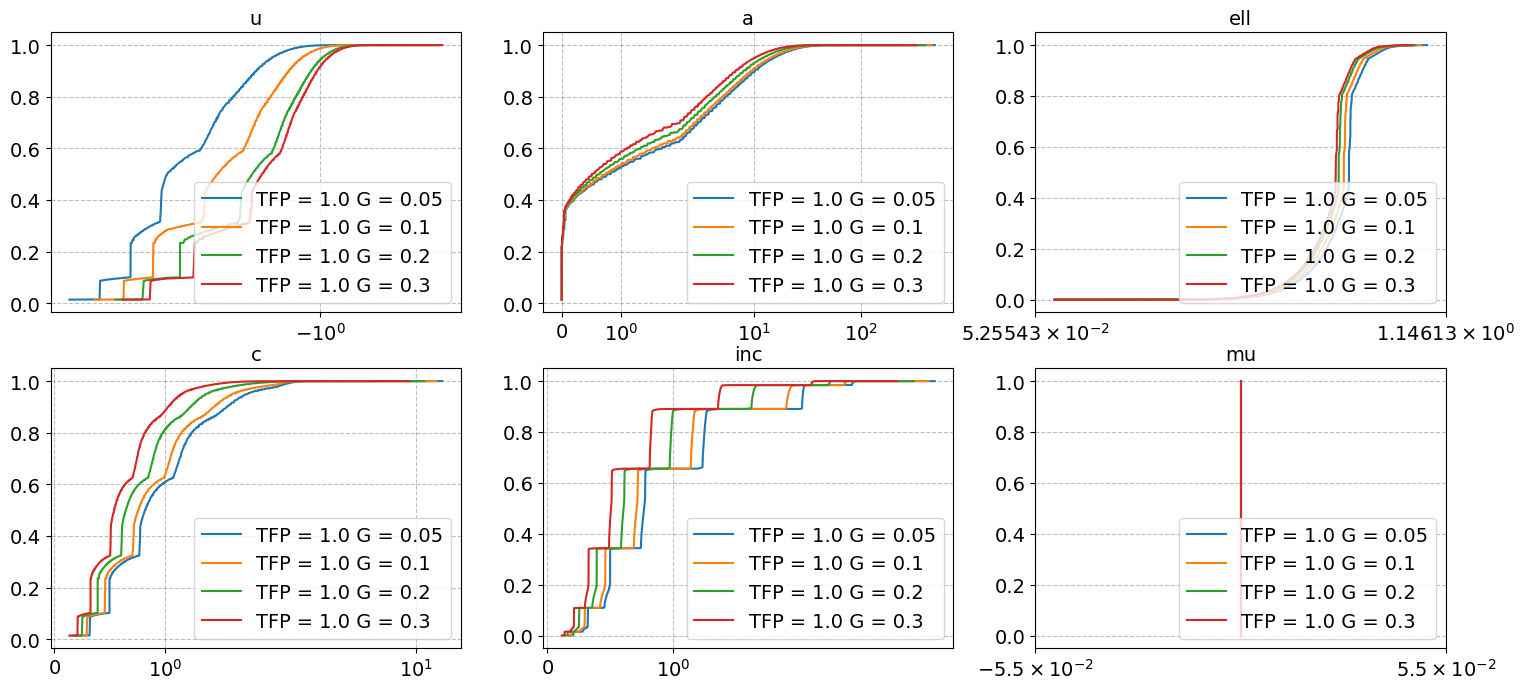

In [14]:
list_models = [dict_sigma11['TFP = 1.0'][f'G = {G}'] for G in list_G_]

plot_CDF_dG_s11 = func.plot_cum(list_models, CDF_vars)

# Saving in path
if export: plt.savefig(path + 'CDF_dG_s11.png', dpi = 300)

**Tables**

## 4. Baumol growth: Stationary Equilibriums

**Plotting AggVarGov**
var over G for different TFP levels

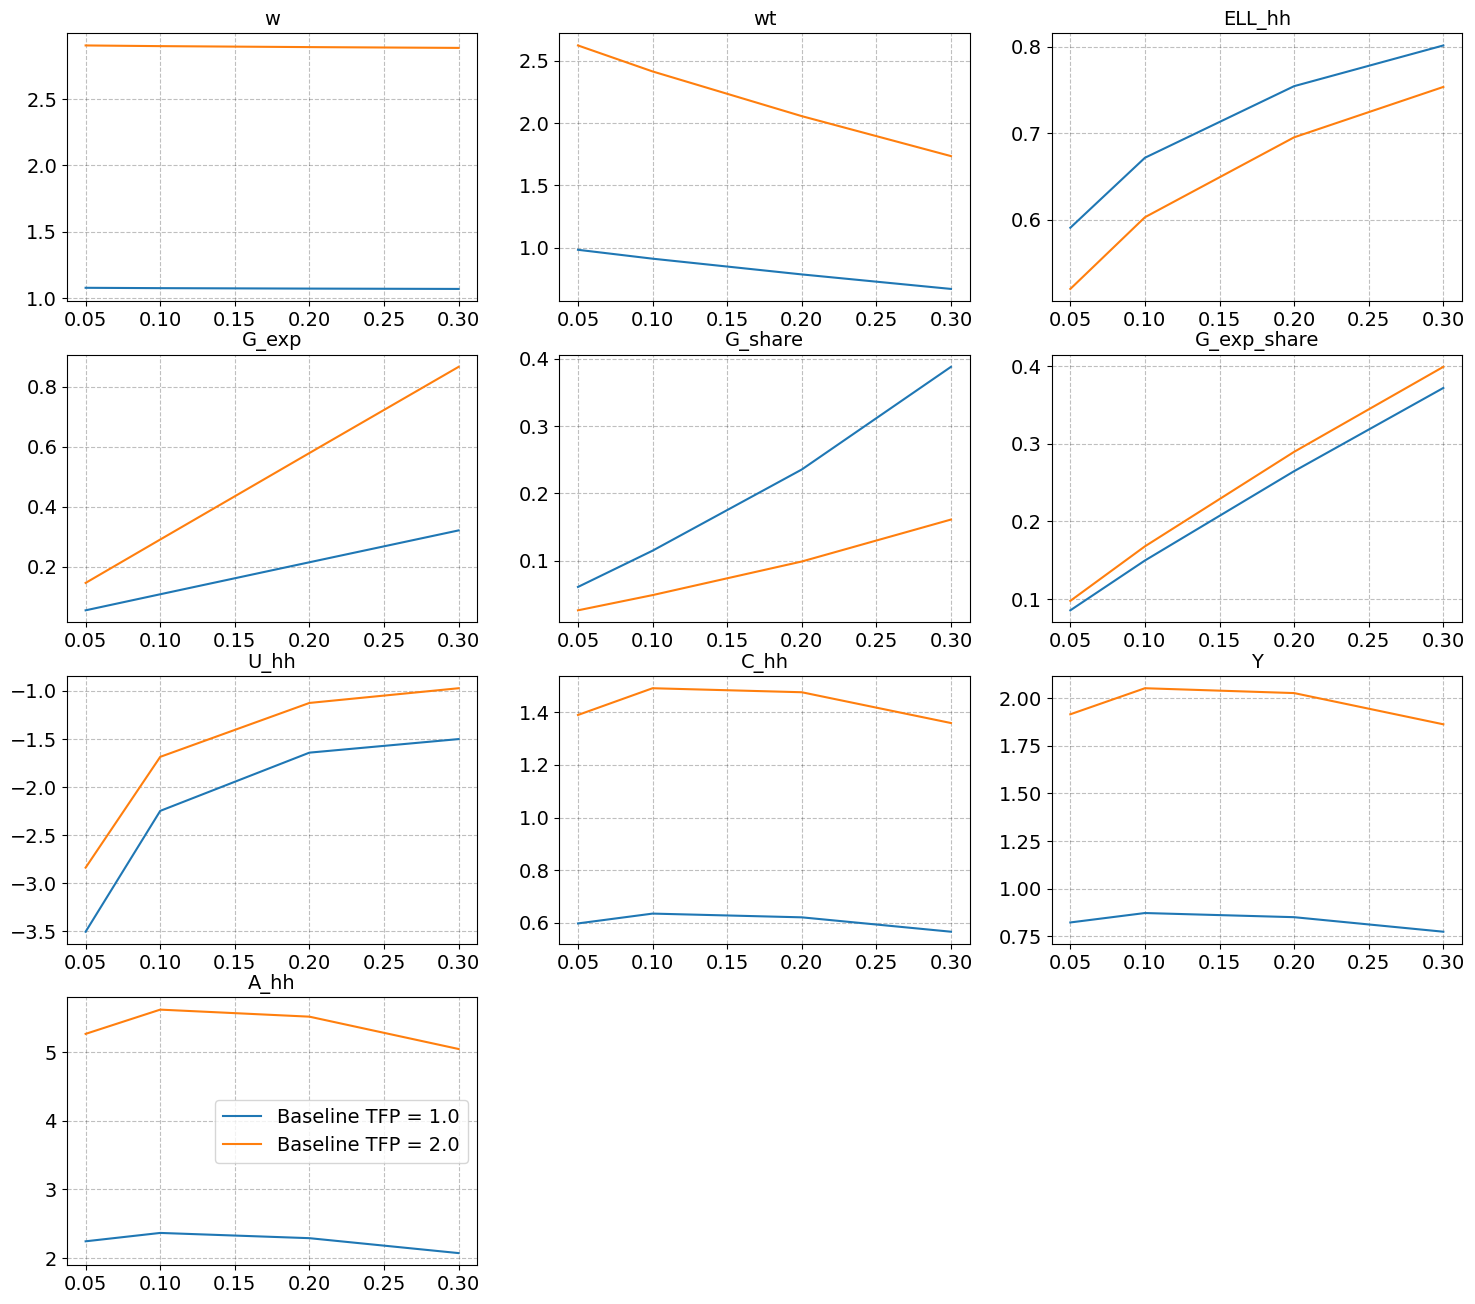

In [15]:
# Base
plot_AggVArGov_TFP_base = func.plot_G_compare([dict_base], vars, list_TFP= list_TFP, list_G=list_G)

# Saving 
if export: plt.savefig(path + 'AggVarGov_TFP_base.png', dpi = 300)

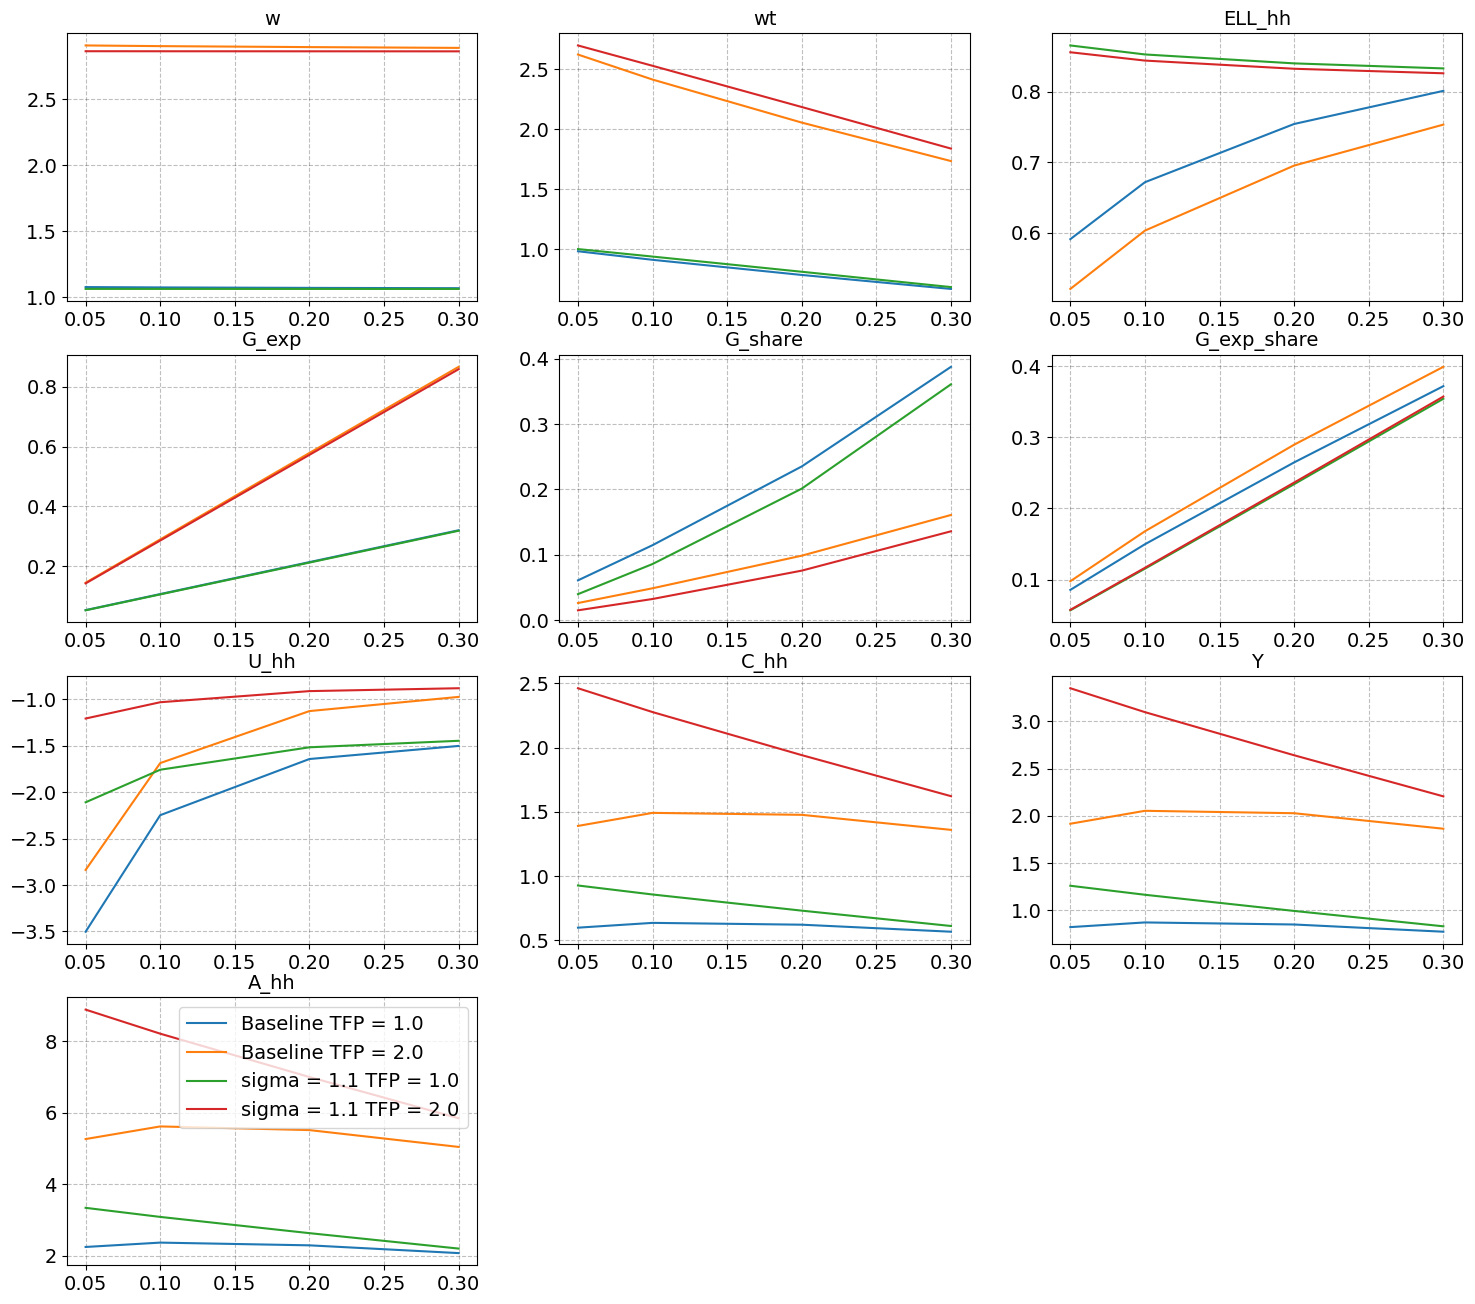

In [ ]:
plot_AggVArGov_TFP_s11 = func.plot_G_compare([ dict_sigma11], vars, list_TFP= list_TFP, list_G=list_G)

# Saving
if export: plt.savefig(path + 'AggVarGov_TFP_s11.png', dpi = 300)

In [ ]:
plot_AggVArGov_TFP_s11 = func.plot_G_compare([dict_base, dict_sigma11], vars, list_TFP= list_TFP, list_G=list_G)

# Saving
if export: plt.savefig(path + 'AggVarGov_TFP_s11.png', dpi = 300)

**Plotting CDF_dTFP**

/Users/gunder/Desktop/Emma_code/Baumol_2707/functions.py:167: RuntimeWarning: invalid value encountered in true_divide
  normalized_weighted_cumulative_values = np.cumsum(sorted_var * sorted_weights) / np.cumsum(sorted_var * sorted_weights)[-1]


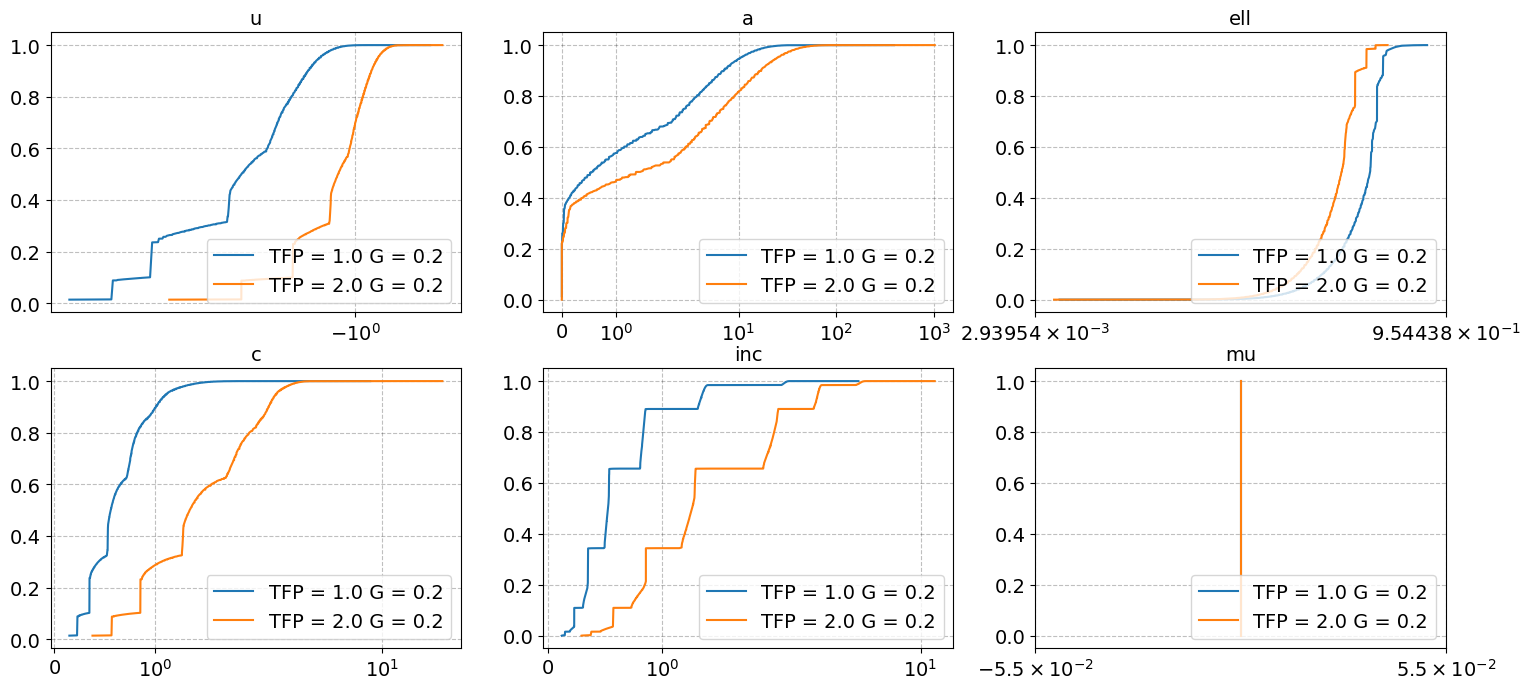

In [18]:
# Fig 3.2 (Base) CDF_dTFP CDF for fixed G = 0.2 over different TFP levels
list_models = [dict_base[f'TFP = {TFP}']['G = 0.2'] for TFP in list_TFP]

plot_CDF_dTFP_base = func.plot_cum(list_models, CDF_vars)

# Saving in path
if export: plt.savefig(path + 'CDF_dTFP_base.png', dpi = 300)

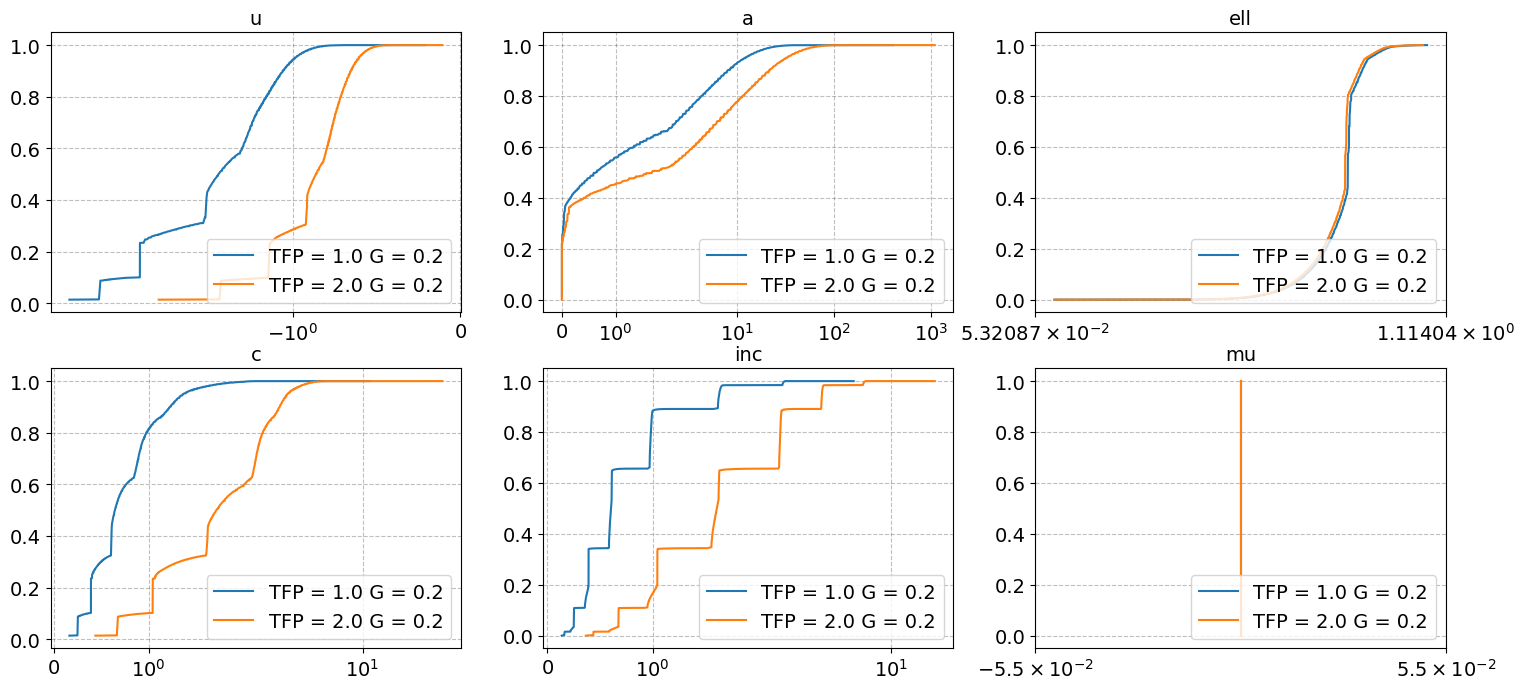

In [19]:
list_models = [dict_sigma11[f'TFP = {TFP}'][f'G = 0.2'] for TFP in list_TFP]

plot_CDF_dG_s11 = func.plot_cum(list_models, CDF_vars)

# Saving in path
if export: plt.savefig(path + 'CDF_dTFP_s11.png', dpi = 300)

## Baumol Growth: Transition Path

Plotting the transition path for an increase in TFP from one steady state to another with fixed G

In [20]:
# Variables for ploting transition path 
paths = vars #['U_hh','ELL_hh', 'w', 'r','tau', 'wt', 'C_hh', 'A_hh',  'L_hh', 'ELL_hh', 'Y', 'clearing_L']
lvl_value = ['U_hh','G','clearing_Y', 'clearing_L']

**Transition path for Sigma < 1**
For G = 0.4

In [21]:
# Choices of ss
trans_TFP_low_base = dict_base['TFP = 1.0']['G = 0.2'].copy(name = 'TFP = 1.0, G = 0.2')
trans_TFP_high_base = dict_base['TFP = 2.0']['G = 0.2'].copy(name = 'TFP = 2.0, G = 0.2')

# Saving starting point 
ini_TFP_base= trans_TFP_low_base.ss.__dict__.copy()

In [22]:
func.table_ss([trans_TFP_low_base, trans_TFP_high_base])

/Users/gunder/Desktop/Emma_code/Baumol_2707/HANCModel.py:133: RuntimeWarning: invalid value encountered in true_divide
  U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
/Users/gunder/Desktop/Emma_code/Baumol_2707/HANCModel.py:133: RuntimeWarning: invalid value encountered in true_divide
  U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])


,"TFP = 1.0, G = 0.2","TFP = 2.0, G = 0.2"
Variable,,
K,2.291,5.515
L_Y,0.556,0.491
rK,0.111,0.110
w,1.071,2.893
Y,0.850,2.028
Gamma_Y,1.000,2.000
A,2.291,5.515
r,0.011,0.010
tau,0.265,0.290


In [23]:
# Calculating jacobians 
trans_TFP_high_base.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for G               in 6.9 secs
curly_Y and curly_D calculated for r               in 7.0 secs
curly_Y and curly_D calculated for wt              in 6.9 secs
curly_E calculated in 0.7 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 21.7 secs

full Jacobians:
full Jacobian to unknowns computed in 0.5 secs [in evaluate_blocks(): 0.4 secs]
full Jacobian to shocks computed in 0.5 secs [in evaluate_blocks(): 0.3 secs]


In [24]:
# Testing
# base_high.test_jacs()
# base_high.test_path()

In [25]:
# Finding transition path
trans_TFP_high_base.find_transition_path(shocks=[], ini=ini_TFP_base, do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.26e+00
   1.90e+00 in clearing_A
   3.26e+00 in clearing_Y
   3.42e-02 in clearing_G
 it =   1 -> max. abs. error = 3.90e-01
   3.05e-01 in clearing_A
   3.90e-01 in clearing_Y
   5.04e-03 in clearing_G
 it =   2 -> max. abs. error = 2.53e-01
   1.88e-01 in clearing_A
   2.53e-01 in clearing_Y
   7.00e-03 in clearing_G
 it =   3 -> max. abs. error = 3.80e-02
   1.39e-02 in clearing_A
   3.80e-02 in clearing_Y
   6.86e-03 in clearing_G
 it =   4 -> max. abs. error = 1.05e-02
   7.73e-04 in clearing_A
   1.05e-02 in clearing_Y
   4.15e-03 in clearing_G
 it =   5 -> max. abs. error = 3.87e-03
   3.87e-03 in clearing_A
   1.82e-03 in clearing_Y
   1.61e-03 in clearing_G
 it =   6 -> max. abs. error = 1.61e-03
   1.61e-03 in clearing_A
   3.04e-04 in clearing_Y
   1.19e-03 in clearing_G
 it =   7 -> max. abs. error = 9.85e-04
   9.85e-04 in clearing_A
   1.07e-04 in clearing_Y
   6.96e-04 in clearing_G
 it =   8 -> max. abs. erro

### shocks ###


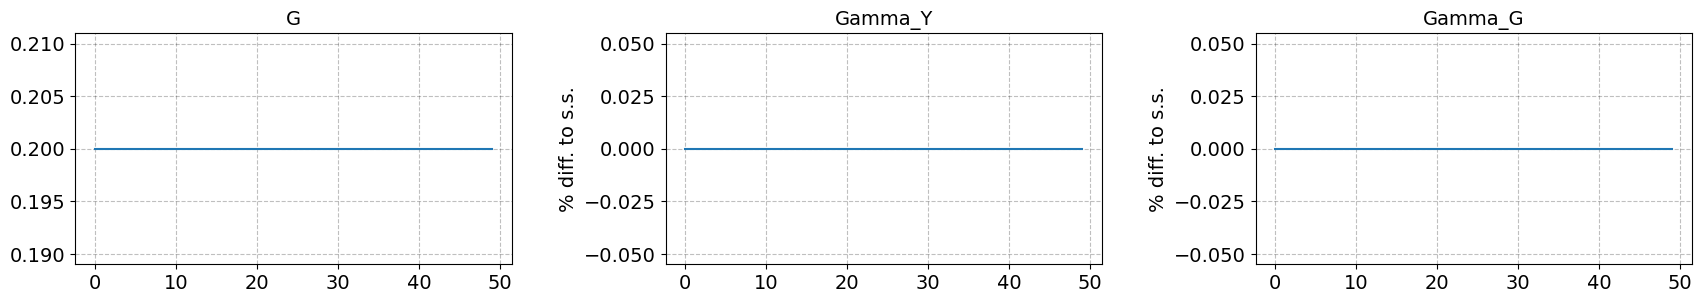


### varnames ###


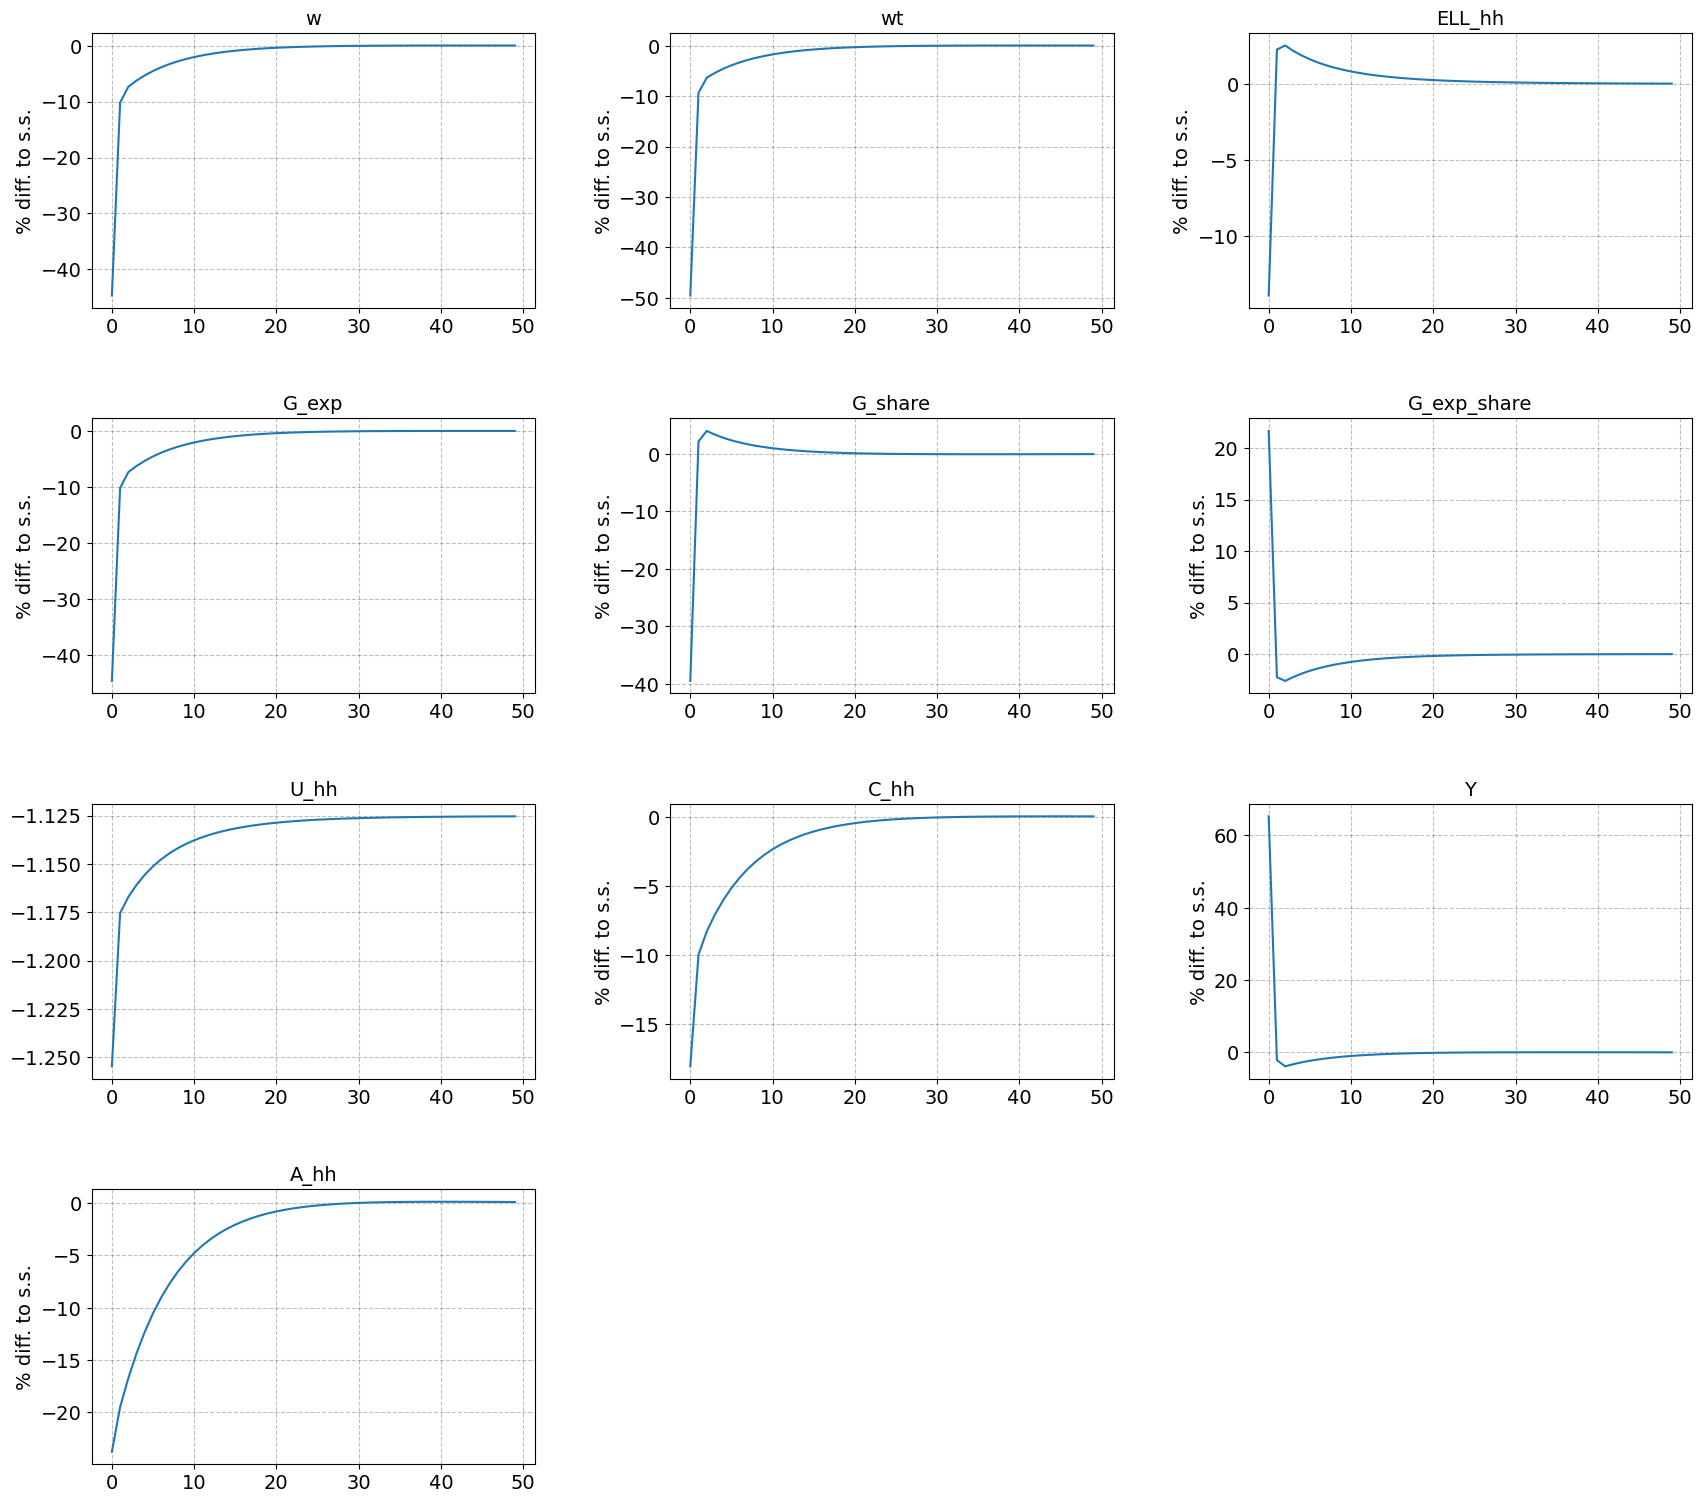


### tagets ###


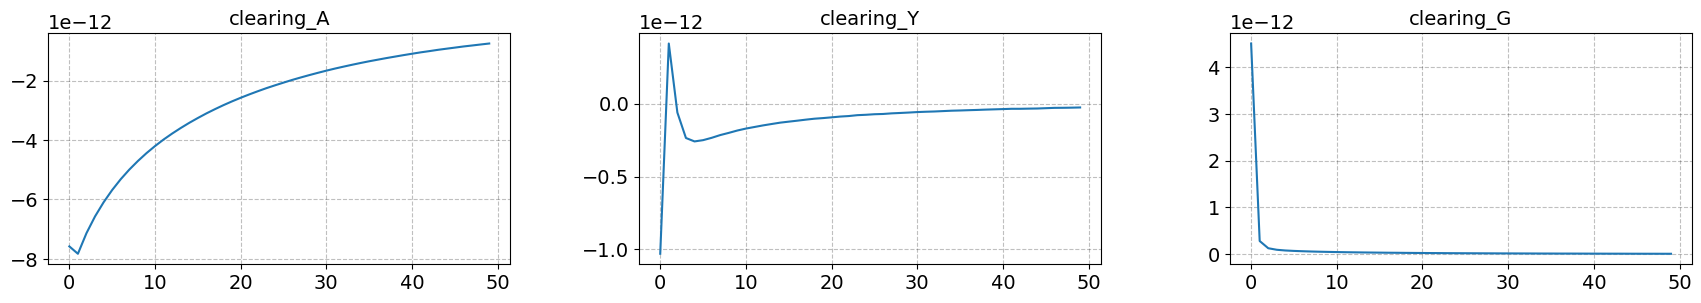

In [26]:
trans_TFP_high_base.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

Decomposition of the transition path for Sigma < 1

**Transition path for sigma > 1**

In [27]:
# Choices of ss
trans_TFP_low_s11 = dict_sigma11['TFP = 1.0']['G = 0.2'].copy(name = 'TFP = 1.0, G = 0.2')
trans_TFP_high_s11 = dict_sigma11['TFP = 2.0']['G = 0.2'].copy(name = 'TFP = 2.0, G = 0.2')

# Saving starting point 
ini_TFP_s11= trans_TFP_low_s11.ss.__dict__.copy()

In [28]:
func.table_ss([trans_TFP_low_s11, trans_TFP_high_s11])

/Users/gunder/Desktop/Emma_code/Baumol_2707/HANCModel.py:133: RuntimeWarning: invalid value encountered in true_divide
  U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
/Users/gunder/Desktop/Emma_code/Baumol_2707/HANCModel.py:133: RuntimeWarning: invalid value encountered in true_divide
  U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])


,"TFP = 1.0, G = 0.2","TFP = 2.0, G = 0.2"
Variable,,
K,2.632,7.000
L_Y,0.654,0.646
rK,0.113,0.113
w,1.063,2.861
Y,0.993,2.641
Gamma_Y,1.000,2.000
A,2.632,7.000
r,0.013,0.013
tau,0.234,0.236


In [29]:
# Calculating jacobians 
trans_TFP_high_s11.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for G               in 6.6 secs
curly_Y and curly_D calculated for r               in 6.6 secs
curly_Y and curly_D calculated for wt              in 6.6 secs
curly_E calculated in 0.1 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 20.1 secs

full Jacobians:
full Jacobian to unknowns computed in 0.4 secs [in evaluate_blocks(): 0.3 secs]
full Jacobian to shocks computed in 0.4 secs [in evaluate_blocks(): 0.3 secs]


In [30]:
# Finding transition path
trans_TFP_high_s11.find_transition_path(shocks=[], ini=ini_TFP_s11, do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 4.43e+00
   2.73e+00 in clearing_A
   4.43e+00 in clearing_Y
   4.02e-02 in clearing_G
 it =   1 -> max. abs. error = 5.27e-01
   3.82e-01 in clearing_A
   5.27e-01 in clearing_Y
   2.45e-03 in clearing_G
 it =   2 -> max. abs. error = 3.46e-01
   2.39e-01 in clearing_A
   3.46e-01 in clearing_Y
   5.56e-03 in clearing_G
 it =   3 -> max. abs. error = 3.23e-02
   7.16e-03 in clearing_A
   3.23e-02 in clearing_Y
   7.46e-03 in clearing_G
 it =   4 -> max. abs. error = 1.41e-02
   2.67e-03 in clearing_A
   1.41e-02 in clearing_Y
   4.65e-03 in clearing_G
 it =   5 -> max. abs. error = 6.40e-01
   2.37e-01 in clearing_A
   6.40e-01 in clearing_Y
   1.12e-01 in clearing_G
 it =   6 -> max. abs. error = 2.50e-03
   2.19e-03 in clearing_A
   2.50e-03 in clearing_Y
   1.93e-03 in clearing_G
 it =   7 -> max. abs. error = 1.10e-03
   1.10e-03 in clearing_A
   7.86e-04 in clearing_Y
   1.06e-03 in clearing_G
 it =   8 -> max. abs. erro

### shocks ###


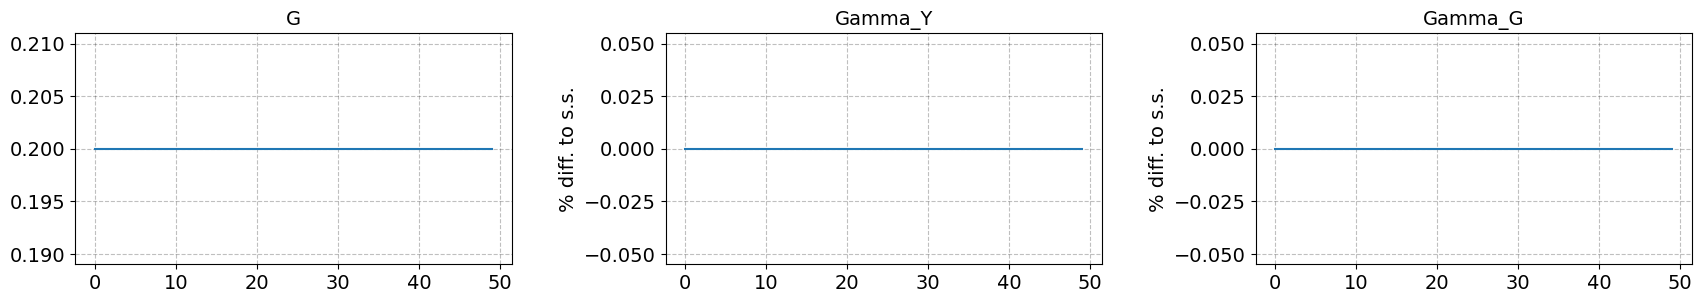


### varnames ###


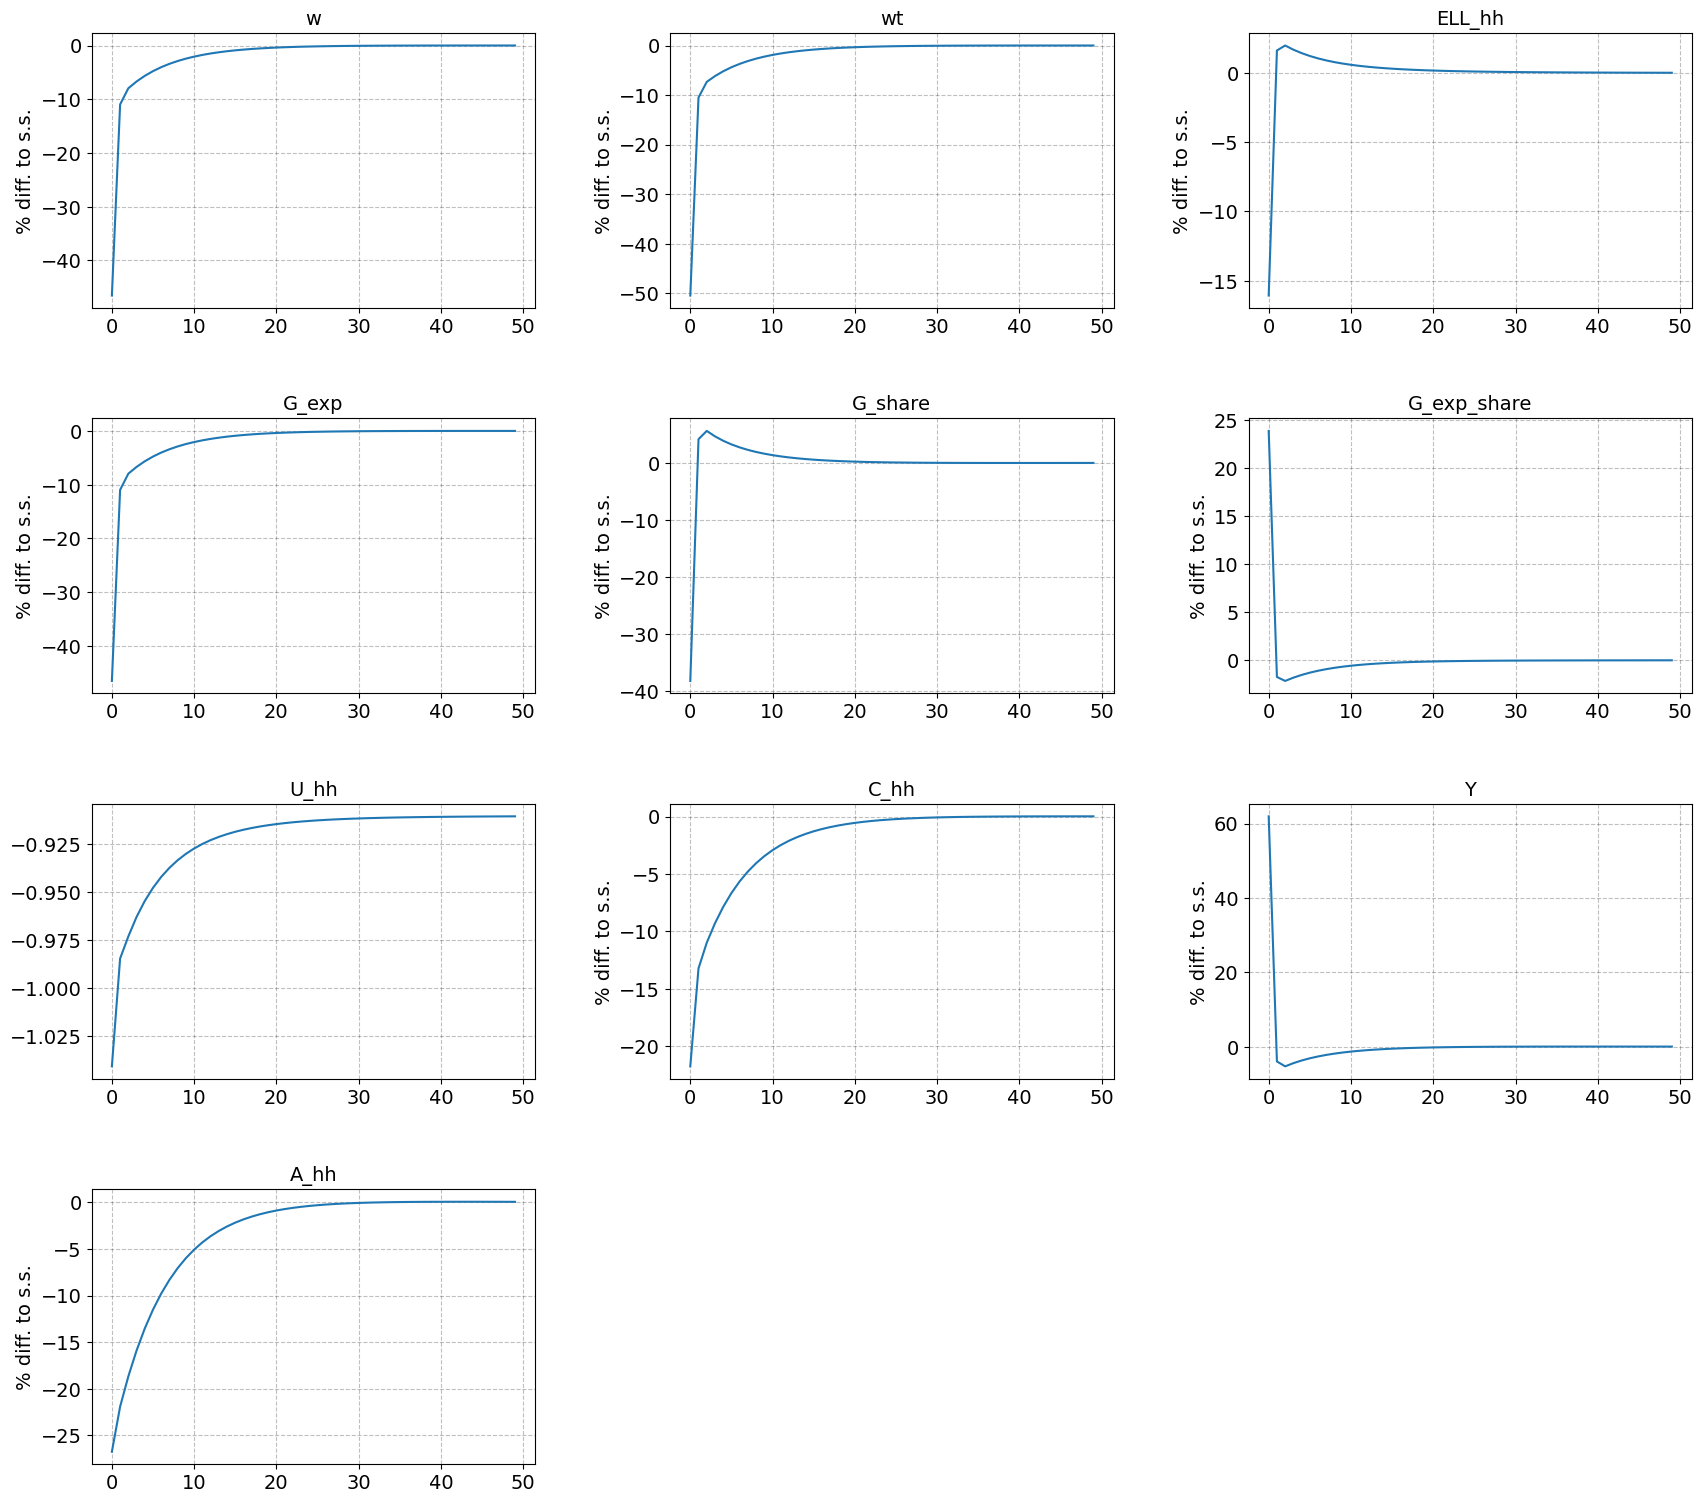


### tagets ###


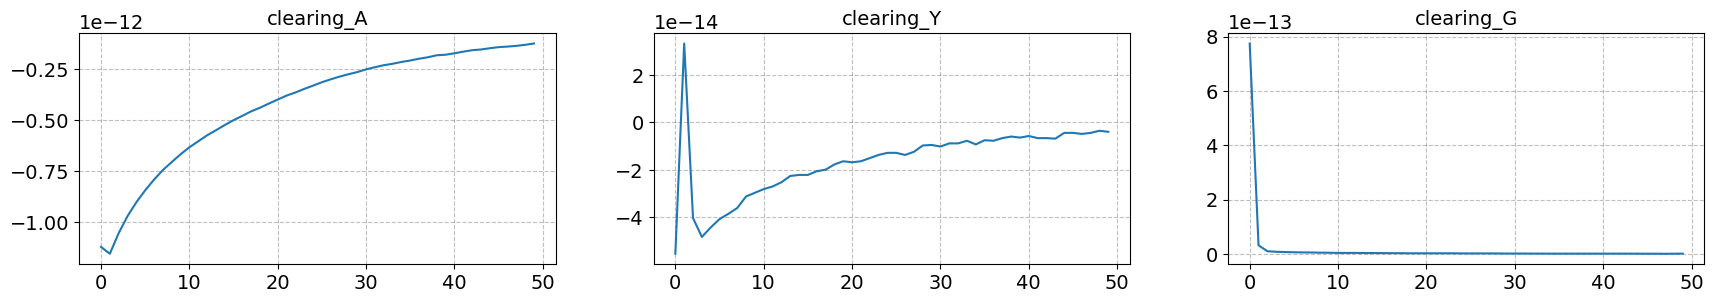

In [31]:
trans_TFP_high_s11.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

### shocks ###


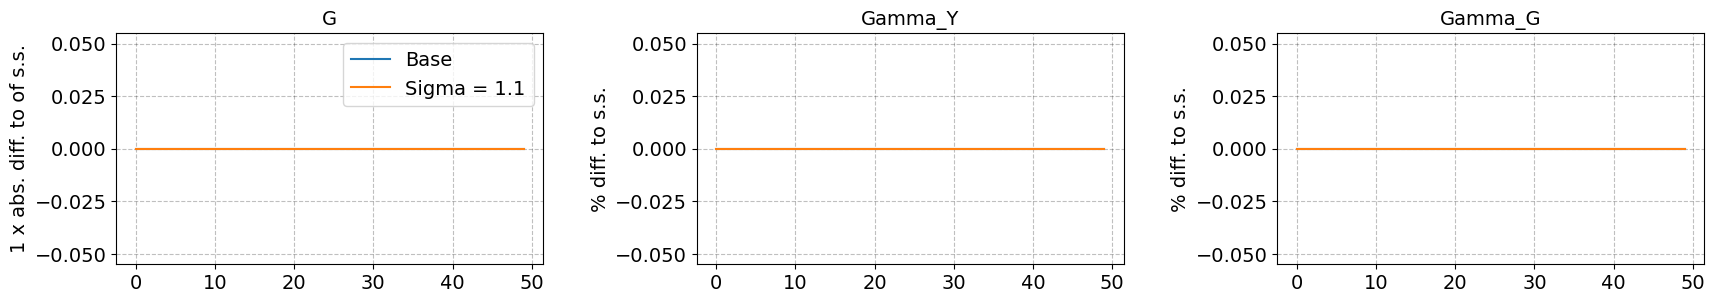


### varnames ###


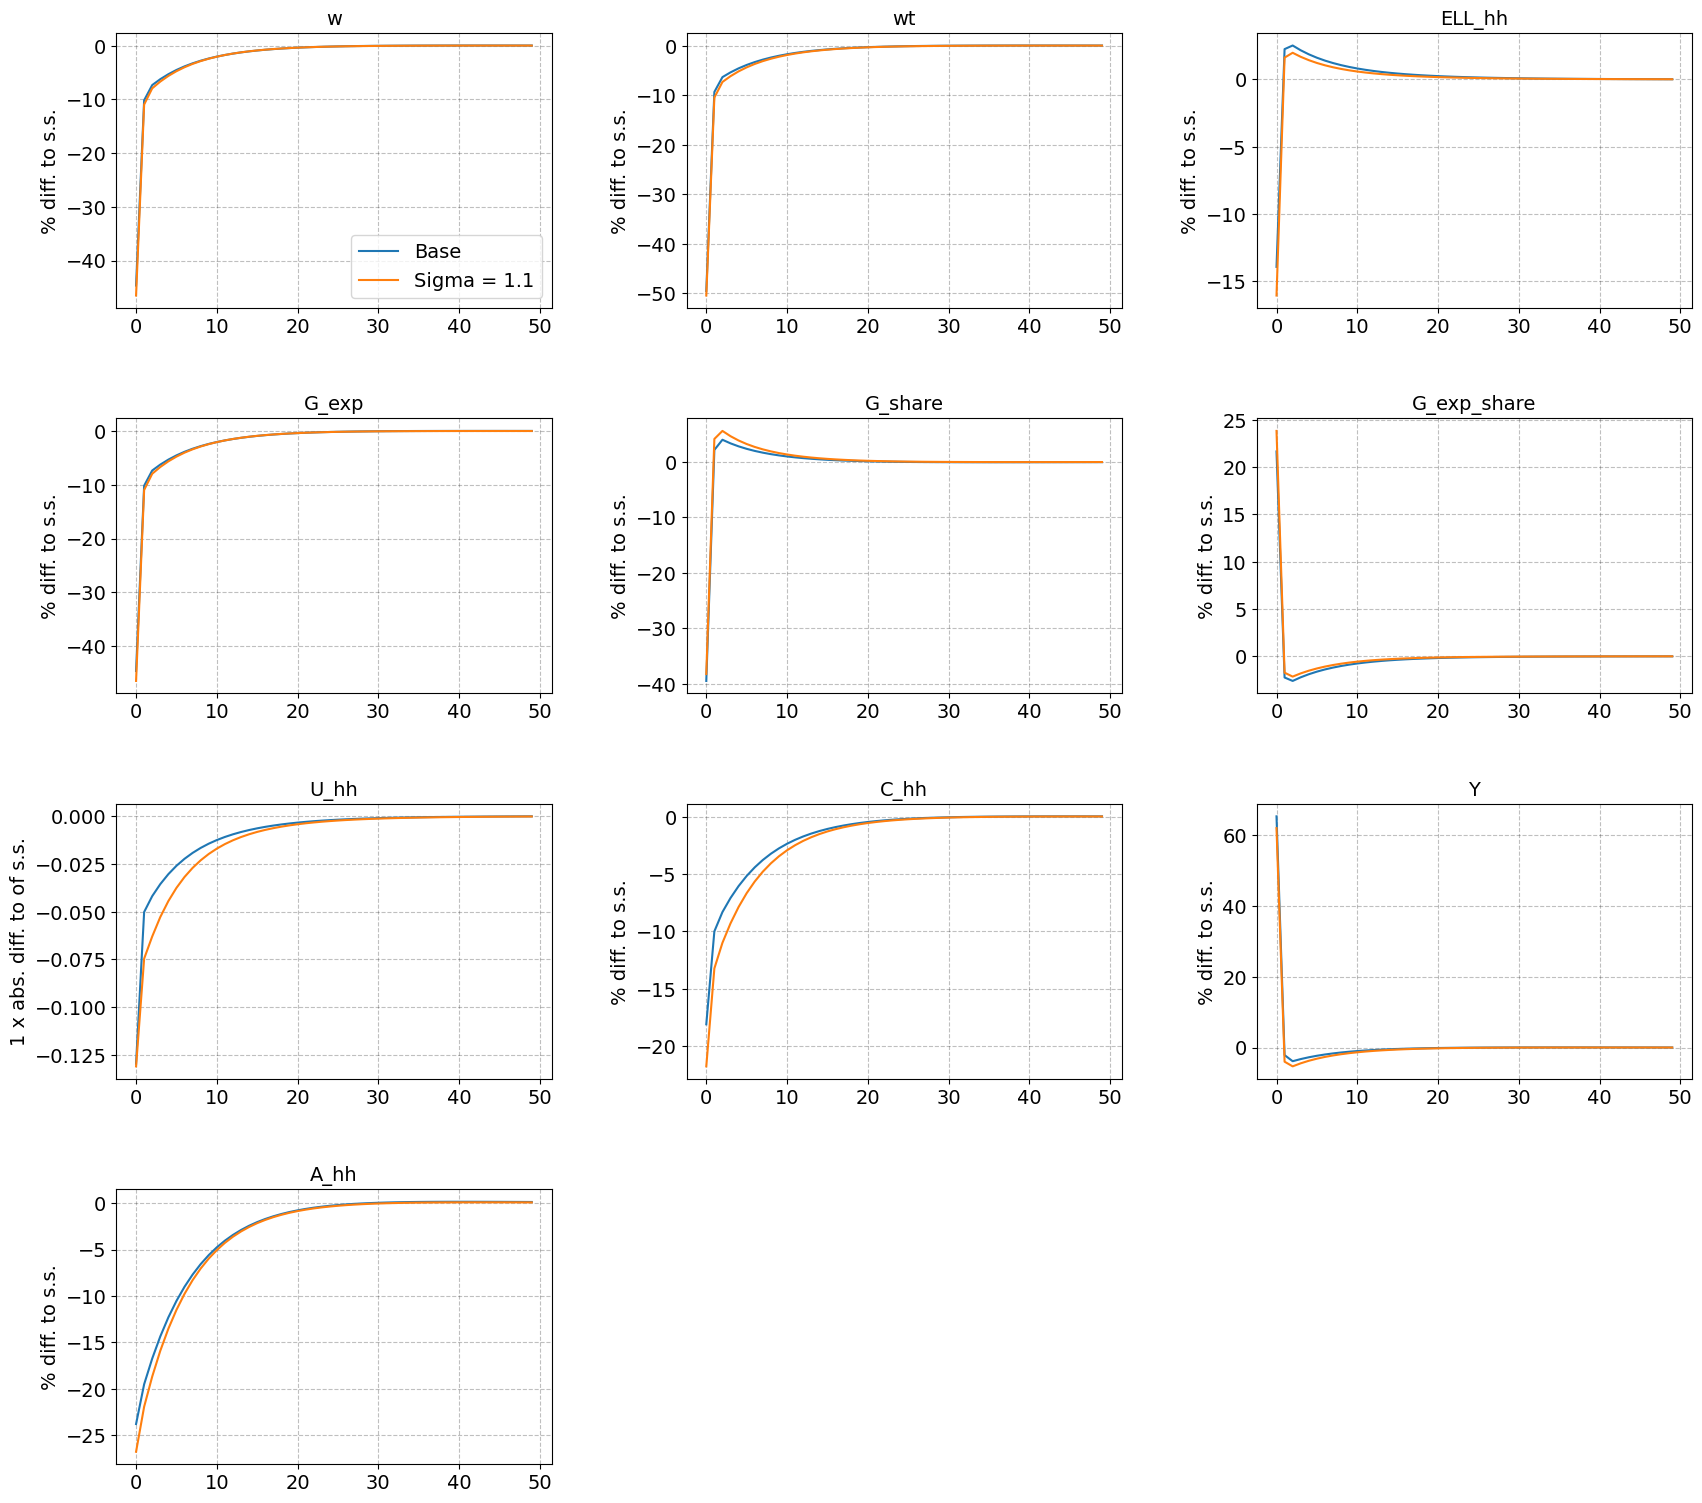


### tagets ###


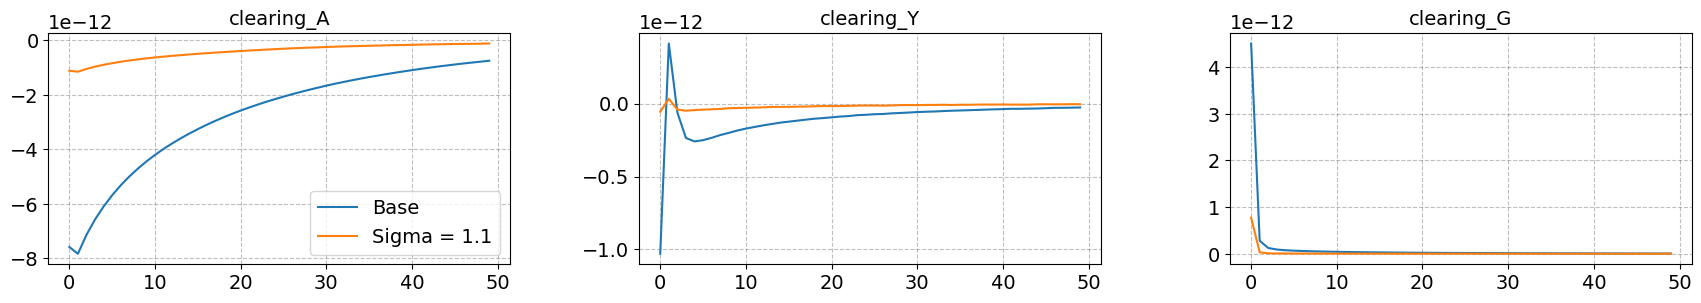

In [32]:
trans_TFP_high_base.compare_IRFs([trans_TFP_high_base, trans_TFP_high_s11], ['Base', 'Sigma = 1.1'], paths, lvl_value, T_max=50, ncols=3)

## Transition path for an increase in G

In [33]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
plot_trans_TFP_dec_base = func.plot_dec(trans_TFP_high_base, 'U_hh', ['r', 'tau', 'G', 'w', 'Gamma_Y', 'all', 'wt', 'tau'])

if export: plt.savefig(path + 'trans_TFP_dec_base.png', dpi = 300)

In [ ]:

base_lowG = dict_base['TFP = 1.0']['G = 0.2']
base_highG = dict_base['TFP = 1.0']['G = 0.3']

# Saving starting point
ini_baseG = base_lowG.ss.__dict__.copy()

In [ ]:
func.table_ss([base_lowG, base_highG])

In [ ]:
base_highG.compute_jacs(do_print=True)

In [ ]:
base_highG.find_transition_path(shocks=[], ini=ini_baseG, do_print=True)

In [ ]:
base_highG.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

In [ ]:
plot_dec(base_highG, 'C_hh', T_max=50)

In [ ]:
fig = func.plot_dec(base_highG, 'U_hh', [ 'G',['wt', 'r']], T_max=10)


In [ ]:
model_test = dict_sigma11['TFP = 1.0']['G = 0.3'].copy(name = 'Linear inreases in G')

model_test.compute_jacs()

length_implementation = 10

dG = np.zeros(par.T)


for t in range(length_implementation):
    dG[t] = 0.2

shocks = {'dG':dG} 

model_test.find_transition_path(shocks=shocks)
model_test.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)
func.plot_dec(model_test, 'ELL_hh', [ 'G','wt', 'r', 'all'], T_max=50)

In [ ]:
model_test.show_IRFs(paths,lvl_value=lvl_value,T_max=50,ncols=3)

In [ ]:
func.plot_dec(model_test, 'ELL_hh', [ 'G','wt', 'r', 'all'], T_max=50)